In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

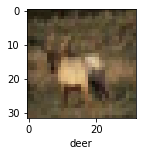

In [11]:
plot_sample(X_train, y_train, 3)

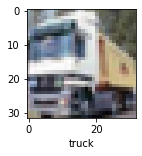

In [12]:
plot_sample(X_train, y_train, 1)

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.8157 - accuracy: 0.3541
Epoch 2/5
1563/1563 [==============================] - 43s 28ms/step - loss: 1.6253 - accuracy: 0.4267
Epoch 3/5
1563/1563 [==============================] - 41s 26ms/step - loss: 1.5412 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 38s 25ms/step - loss: 1.4808 - accuracy: 0.4786
Epoch 5/5
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4326 - accuracy: 0.4959


In [15]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.47      0.54      1000
           1       0.32      0.89      0.47      1000
           2       0.43      0.27      0.33      1000
           3       0.33      0.42      0.37      1000
           4       0.51      0.26      0.35      1000
           5       0.54      0.21      0.30      1000
           6       0.40      0.71      0.51      1000
           7       0.68      0.43      0.53      1000
           8       0.67      0.44      0.54      1000
           9       0.54      0.32      0.40      1000

    accuracy                           0.44     10000
   macro avg       0.51      0.44      0.43     10000
weighted avg       0.51      0.44      0.43     10000



In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4640 - accuracy: 0.4696
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1049 - accuracy: 0.6137
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9733 - accuracy: 0.6610
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8867 - accuracy: 0.6915
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8219 - accuracy: 0.7165
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7659 - accuracy: 0.7340
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7115 - accuracy: 0.7544
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6684 - accuracy: 0.7668
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6234 - accuracy: 0.7836
Epoch 10/10
1563/1563 [==============================] - 17s 11m

In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9749 - accuracy: 0.6870


[0.9749382734298706, 0.6869999766349792]

In [20]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.9382819e-03, 1.5142412e-04, 3.3078546e-04, 9.0835202e-01,
        2.3163570e-04, 4.7352824e-02, 1.5457615e-02, 9.1960410e-06,
        2.3683539e-02, 4.9263961e-04],
       [1.5709238e-02, 1.3164078e-01, 1.4237338e-06, 2.6401736e-07,
        2.1220146e-08, 1.6223435e-09, 1.2664157e-10, 7.8876167e-10,
        8.5206676e-01, 5.8148004e-04],
       [9.5004857e-02, 4.9623367e-01, 2.7006359e-03, 9.3602566e-03,
        2.3129291e-03, 1.7475280e-03, 1.9895313e-03, 4.9884617e-03,
        3.6573344e-01, 1.9928603e-02],
       [9.0201873e-01, 1.2302454e-02, 6.3898077e-04, 6.5098534e-04,
        3.5256922e-02, 6.0940602e-06, 9.9924000e-05, 4.5452212e-05,
        4.8755836e-02, 2.2455216e-04],
       [9.3932670e-08, 1.4817947e-05, 2.3231972e-03, 1.5412106e-02,
        7.4646199e-01, 4.5882063e-03, 2.3070730e-01, 1.7347468e-06,
        4.8520815e-04, 5.2517225e-06]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [22]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

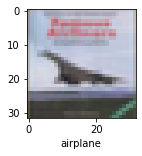

In [23]:
plot_sample(X_test, y_test,3)

In [24]:
classes[y_classes[3]]

'airplane'

In [25]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix